In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('jamb_exam_results.csv')
df.head().T

,0,1,2,3,4
JAMB_Score,192,207,182,210,199
Study_Hours_Per_Week,22,14,29,29,12
Attendance_Rate,78,88,87,99,98
Teacher_Quality,4,4,2,2,3
Distance_To_School,12.4,2.7,9.6,2.6,8.8
School_Type,Public,Public,Public,Public,Public
School_Location,Urban,Rural,Rural,Urban,Urban
Extra_Tutorials,Yes,No,Yes,No,No
Access_To_Learning_Materials,Yes,Yes,Yes,Yes,Yes
Parent_Involvement,High,High,High,Medium,Medium


In [42]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [5]:
len(df)

5000

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [10]:
del df['student_id']

In [11]:
df['parent_education_level'] = df['parent_education_level'].fillna('0')

In [14]:
df['parent_education_level'].value_counts()

parent_education_level
Secondary    1556
Primary      1335
Tertiary     1218
0             891
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train['jamb_score'].values
y_test = df_test['jamb_score'].values
y_val = df_val['jamb_score'].values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text

In [77]:
train_d = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_d)

In [80]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [81]:
val_d = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_d)
y_val_pred = model.predict(X_val)

In [87]:
 'Val', root_mean_squared_error(y_val, y_val_pred), 'Train', root_mean_squared_error(y_train, y_train_pred)

('Val', np.float64(45.80335905740839), 'Train', np.float64(44.03387763193034))

In [88]:
print(export_text(model, feature_names = dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [89]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [96]:
y_val_pred = rf.predict(X_val)

In [97]:
round(root_mean_squared_error(y_val_pred, y_val), 3)

np.float64(41.825)

In [99]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_val_pred = rf.predict(X_val)
    scores.append(root_mean_squared_error(y_val_pred, y_val))
scores

[np.float64(41.82546234054084),
 np.float64(41.19602596125019),
 np.float64(40.856505465946164),
 np.float64(40.66637198749109),
 np.float64(40.678118442228865),
 np.float64(40.6039010304292),
 np.float64(40.53460449582126),
 np.float64(40.403939657461),
 np.float64(40.376522525281544),
 np.float64(40.43028290774132),
 np.float64(40.47245412796827),
 np.float64(40.52150253517672),
 np.float64(40.529568505653224),
 np.float64(40.4652468105506),
 np.float64(40.43557058443579),
 np.float64(40.46153425052305),
 np.float64(40.47871275067374),
 np.float64(40.4824103492515),
 np.float64(40.46830275530142),
 np.float64(40.454002673715735)]

In [109]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

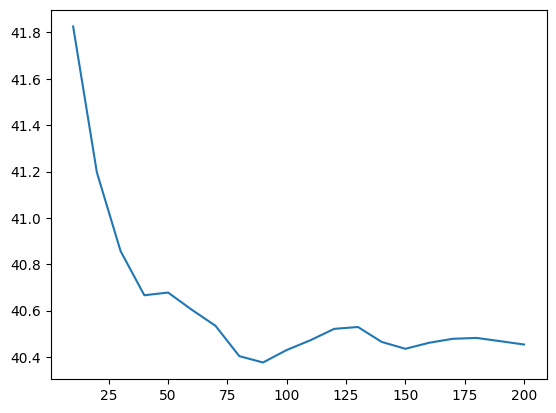

In [105]:
plt.plot(list(range(10, 201, 10)), scores)

In [106]:
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=1)
        rf.fit(X_train, y_train)
        y_val_pred = rf.predict(X_val)
        scores.append((d, n, root_mean_squared_error(y_val_pred, y_val)))

In [117]:
df_m = pd.DataFrame(scores, columns = ['Depth', 'Estimators', 'MRSE'])
df_pivot = df_m.pivot(index='Estimators', columns=['Depth'], values=['MRSE'])
df_pivot.round(3)

df_m.groupby('Depth')['MRSE'].mean()

Depth
10    40.365023
15    40.639766
20    40.684563
25    40.611362
Name: MRSE, dtype: float64

<Axes: xlabel='None-Depth', ylabel='Estimators'>

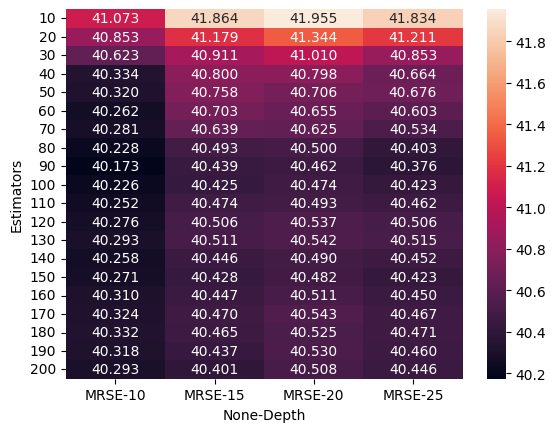

In [113]:
sns.heatmap(df_pivot, annot=True, fmt=".3f")

In [119]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model = rf.fit(X_train, y_train)

In [120]:
model

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [127]:
sorted(list(zip(model.feature_importances_, dv.feature_names_)), key = lambda x: x[0], reverse = True)

[(np.float64(0.24633057043200604), 'study_hours_per_week'),
 (np.float64(0.14898618969859487), 'attendance_rate'),
 (np.float64(0.13492520734384725), 'distance_to_school'),
 (np.float64(0.082242509943574), 'teacher_quality'),
 (np.float64(0.06981165638053081), 'age'),
 (np.float64(0.03049321078917727), 'assignments_completed'),
 (np.float64(0.02570122206274086), 'socioeconomic_status=High'),
 (np.float64(0.021996810611263278), 'parent_involvement=High'),
 (np.float64(0.017577506158445458), 'it_knowledge=High'),
 (np.float64(0.014976368884603993), 'parent_education_level=Primary'),
 (np.float64(0.014961133515496468), 'parent_education_level=Secondary'),
 (np.float64(0.01423605281422207), 'parent_education_level=Tertiary'),
 (np.float64(0.014000466760602716), 'parent_involvement=Low'),
 (np.float64(0.012159274434287588), 'it_knowledge=Low'),
 (np.float64(0.011702383399409431), 'extra_tutorials=Yes'),
 (np.float64(0.011636246600035045), 'parent_education_level=0'),
 (np.float64(0.01108757

In [128]:
import xgboost as xgb

In [129]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [133]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [134]:
y_va_pred = model.predict(dval)

In [135]:
root_mean_squared_error(y_va_pred, y_val)

np.float64(41.05034017683498)